In [3]:
import numpy as np
import math
import random
import time

In [4]:
def create_city (cityfile):
    cityscape = {}
    with open(cityfile, "r") as city_file:
        for line in city_file:
            line = line.split()
            cityscape[line[0]] = (float(line[1]), float(line[2]))
    return cityscape

In [5]:
def distance (i, j):
    x = i[0] - j[0]
    y = i[1] - j[1]
    distance = math.sqrt(x**2 + y**2) #euclidean distance
    return distance

In [6]:
def length_of_tour (path, city):
    length = 0.0
    for i in range(0, len(path)-1):
        length += distance(city[path[i]], city[path[i+1]])
    length += distance(city[path[len(path)-1]], city[path[0]])
    
    return length

In [7]:
def inverse_distance (i, j):
    x = i[0] - j[0]
    y = i[1] - j[1]
    distance = math.sqrt(x**2 + y**2) #euclidean distance
    return 1.0/distance #inverse distance

In [59]:
def init_ph_graph (city, T_0):
    
    #obtain a list of nodes
    all_nodes = list(city.keys())
    
    #establish a dictionary of the graph
    ph_graph = {}
    
    for i in range(0, len(all_nodes)):
        for j in range(i, len(all_nodes)): #only do one side, save space
            if i != j: #no self edges
                ph_graph["{0} {1}".format(all_nodes[i], all_nodes[j])] = 1.0/T_0 #a small amount > 0
    
    return ph_graph
    

In [48]:
def update_graph (path, ph_graph, city):
    
    #define a list of edges travelled
    all_edges = []
    
    #search all the ant's path
    for i in range(0, len(path)-1):
        all_edges.append((path[i], path[i+1])) #as a tuple
        
    #define ant-k's ph levels
    Lk = length_of_tour(path, city)
    Q = 66.0323178894233 #length of NN algorithm
    delt_ph = Q/Lk #equation 3
    p = 0.1 #defined by our problem
    
    #check all edges against ph_graph and set ph, accounting for alphabetical order
    for edge in all_edges:
        
        try:
            ph = (1-p)*ph_graph["{0} {1}".format(edge[0], edge[1])] + delt_ph
            ph_graph["{0} {1}".format(edge[0], edge[1])] = ph #normal order
        except:
            ph = (1-p)*ph_graph["{0} {1}".format(edge[1], edge[0])] + delt_ph
            ph_graph["{0} {1}".format(edge[1], edge[0])] = ph #otherwise try switched
            
    #return updated graph post ant-k's tour
    return ph_graph

In [49]:
a = "a b c d e f g h i j k l m n o p q r".split(" ")
b = "r q p o n m l k j i h g f e d c b a".split(" ")
city = create_city("cities.dat")
ph_g = init_ph_graph(city)
print(length_of_tour(b, city))
print(update_graph(b, ph_g, city))

66.0180207091077
{'a b': 1.0092165648130922, 'a c': 0.01, 'a d': 0.01, 'a e': 0.01, 'a f': 0.01, 'a g': 0.01, 'a h': 0.01, 'a i': 0.01, 'a j': 0.01, 'a k': 0.01, 'a l': 0.01, 'a m': 0.01, 'a n': 0.01, 'a o': 0.01, 'a p': 0.01, 'a q': 0.01, 'a r': 0.01, 'b c': 1.0092165648130922, 'b d': 0.01, 'b e': 0.01, 'b f': 0.01, 'b g': 0.01, 'b h': 0.01, 'b i': 0.01, 'b j': 0.01, 'b k': 0.01, 'b l': 0.01, 'b m': 0.01, 'b n': 0.01, 'b o': 0.01, 'b p': 0.01, 'b q': 0.01, 'b r': 0.01, 'c d': 1.0092165648130922, 'c e': 0.01, 'c f': 0.01, 'c g': 0.01, 'c h': 0.01, 'c i': 0.01, 'c j': 0.01, 'c k': 0.01, 'c l': 0.01, 'c m': 0.01, 'c n': 0.01, 'c o': 0.01, 'c p': 0.01, 'c q': 0.01, 'c r': 0.01, 'd e': 1.0092165648130922, 'd f': 0.01, 'd g': 0.01, 'd h': 0.01, 'd i': 0.01, 'd j': 0.01, 'd k': 0.01, 'd l': 0.01, 'd m': 0.01, 'd n': 0.01, 'd o': 0.01, 'd p': 0.01, 'd q': 0.01, 'd r': 0.01, 'e f': 1.0092165648130922, 'e g': 0.01, 'e h': 0.01, 'e i': 0.01, 'e j': 0.01, 'e k': 0.01, 'e l': 0.01, 'e m': 0.01, 'e

In [50]:
def do_tour (path, ph_graph, city):
    
    #path is originally just a starting node
    #return should be the input path + one more node travelled (accepted node)
    
    #establish constants
    A = 1
    B = 5
    
    while(True):
        
        #generate all cities not in current path
        rest = []
        for node in city:
            if not node in path:
                rest.append(node)
        
        #exit condition
        if len(rest) == 0:
            return path
                
        current = path[-1] #the last node in the path is the current node i
        potential = rest[random.randint(0,len(rest)-1)] #a random node in the unvisited list is node j
        
        #establish Tij
        try:
            Tij = ph_graph["{0} {1}".format(current, potential)]
        except:
            Tij = ph_graph["{0} {1}".format(potential, current)]
        
        denom = 0.0
        for j in range(0, len(rest)):
            il = rest[j]
            try:
                Til = ph_graph["{0} {1}".format(current, il)]
            except:
                Til = ph_graph["{0} {1}".format(il, current)]
            denom += (Til**A)*(inverse_distance(city[current], city[il])**B)
            
        probability = (Tij**A)*(inverse_distance(city[current], city[potential])**B)/denom
        
        #accept-reject
        if random.random() < probability: #accepted
            path.append(potential) #add to path
    

In [51]:
city = create_city("cities.dat")
print(city.keys())

dict_keys(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r'])


In [52]:
graph = init_ph_graph(city)
ant1 = do_tour(["a"], graph, city)
#print(ant1)
#print(graph)
graph = update_graph(ant1, graph, city)
print(graph)
ant2 = do_tour(["b"], graph, city)
#print(ant2)
#print(graph)
graph = update_graph(ant2, graph, city)
print(graph)
print(ant1, ant2)

{'a b': 2.408834555594641, 'a c': 0.01, 'a d': 0.01, 'a e': 0.01, 'a f': 0.01, 'a g': 0.01, 'a h': 0.01, 'a i': 0.01, 'a j': 0.01, 'a k': 0.01, 'a l': 0.01, 'a m': 0.01, 'a n': 0.01, 'a o': 0.01, 'a p': 0.01, 'a q': 0.01, 'a r': 0.01, 'b c': 0.01, 'b d': 0.01, 'b e': 0.01, 'b f': 0.01, 'b g': 0.01, 'b h': 0.01, 'b i': 0.01, 'b j': 0.01, 'b k': 0.01, 'b l': 0.01, 'b m': 0.01, 'b n': 2.408834555594641, 'b o': 0.01, 'b p': 0.01, 'b q': 0.01, 'b r': 0.01, 'c d': 0.01, 'c e': 0.01, 'c f': 0.01, 'c g': 0.01, 'c h': 2.408834555594641, 'c i': 0.01, 'c j': 0.01, 'c k': 0.01, 'c l': 0.01, 'c m': 0.01, 'c n': 0.01, 'c o': 0.01, 'c p': 0.01, 'c q': 0.01, 'c r': 0.01, 'd e': 0.01, 'd f': 0.01, 'd g': 0.01, 'd h': 0.01, 'd i': 0.01, 'd j': 2.408834555594641, 'd k': 0.01, 'd l': 0.01, 'd m': 0.01, 'd n': 0.01, 'd o': 0.01, 'd p': 0.01, 'd q': 2.408834555594641, 'd r': 0.01, 'e f': 0.01, 'e g': 0.01, 'e h': 0.01, 'e i': 0.01, 'e j': 0.01, 'e k': 0.01, 'e l': 2.408834555594641, 'e m': 0.01, 'e n': 0.01

In [61]:
def ant_search (cityfile, rank, timesteps):
    
    #create the city
    city = create_city(cityfile)
    
    #find T_0
    sum = 0.0
    for trial in range (0, 10):
        sum+= nearest_neighbor(cityfile)[1]
    T_0 = 1/(sum/10.0)
    
    #initialize the graph
    ph_graph = init_ph_graph(city, T_0)
    
    for t in range (0, timesteps):
        for k in range (0, rank):
            
            #random city start and clear this timestep's paths
            nodes = list(city.keys())
            ant_paths = []            
            
            ant_k_path = [nodes[random.randint(0, len(nodes)-1)]]
            #ant-k makes a move
            ant_paths.append(do_tour(ant_k_path, ph_graph, city)) #determine ant-k's move
        
        #update the graph after all ants have moved
        for paths in ant_paths:
            ph_graph = update_graph(paths, ph_graph, city) #update the graph
    
        #keep the best solution at the end of the timesteps
        length_best = float('inf')
        best = []
        for i in range(0, len(ant_paths)):
            k_path = length_of_tour(ant_paths[i], city)
            if k_path < length_best:
                best = ant_paths[i][:]
    
    return best, length_of_tour(best, city)

In [65]:
sol = ant_search("cities2.dat", 10, 10)
print(sol)
sol2 = ant_search("cities2.dat", 20, 20)
print(sol2)
sol3 = ant_search("cities2.dat", 10, 20)
print(sol3)
sol4 = ant_search("cities2.dat", 20, 10)
print(sol4)

(['c48', 'c46', 'c49', 'c41', 'c44', 'c39', 'c37', 'c29', 'c16', 'c20', 'c09', 'c13', 'c04', 'c05', 'c21', 'c17', 'c15', 'c12', 'c10', 'c19', 'c24', 'c26', 'c33', 'c31', 'c28', 'c23', 'c25', 'c32', 'c30', 'c27', 'c18', 'c14', 'c11', 'c08', 'c38', 'c42', 'c40', 'c36', 'c34', 'c45', 'c47', 'c43', 'c35', 'c22', 'c01', 'c03', 'c07', 'c02', 'c06'], 3.405440250422679)
(['c48', 'c49', 'c46', 'c13', 'c09', 'c20', 'c16', 'c29', 'c39', 'c37', 'c26', 'c24', 'c33', 'c31', 'c28', 'c21', 'c25', 'c23', 'c18', 'c27', 'c30', 'c32', 'c34', 'c36', 'c40', 'c42', 'c38', 'c14', 'c11', 'c08', 'c07', 'c10', 'c12', 'c15', 'c17', 'c19', 'c43', 'c47', 'c45', 'c44', 'c41', 'c06', 'c02', 'c01', 'c03', 'c04', 'c05', 'c35', 'c22'], 3.9453147332574137)
(['c39', 'c37', 'c33', 'c31', 'c28', 'c21', 'c25', 'c23', 'c18', 'c27', 'c30', 'c32', 'c34', 'c36', 'c40', 'c42', 'c45', 'c38', 'c14', 'c08', 'c11', 'c35', 'c43', 'c47', 'c20', 'c16', 'c29', 'c26', 'c24', 'c19', 'c17', 'c15', 'c12', 'c10', 'c07', 'c06', 'c09', 'c13', '

In [67]:
sol5 = ant_search("cities2.dat", 50, 20)
print(sol5)

(['c25', 'c23', 'c32', 'c30', 'c27', 'c18', 'c14', 'c11', 'c08', 'c17', 'c19', 'c24', 'c26', 'c37', 'c39', 'c29', 'c20', 'c16', 'c36', 'c34', 'c40', 'c42', 'c38', 'c45', 'c47', 'c43', 'c35', 'c22', 'c06', 'c09', 'c13', 'c04', 'c05', 'c48', 'c49', 'c46', 'c41', 'c44', 'c31', 'c33', 'c28', 'c21', 'c15', 'c12', 'c10', 'c07', 'c03', 'c01', 'c02'], 3.247319775363781)


In [45]:
def nearest_neighbor(cityfile):
    city = create_city(cityfile)
    
    nodes = list(city.keys())
    path = [nodes[random.randint(0, len(nodes)-1)]]
    #path = ['i'] #for testing consistency
    
    visited = []
    current = path[-1]
    
    while(1):
        
        #create the rest of the options
        rest = []
        for node in nodes:
            if not node in path:
                rest.append(node)
        
        #exit condition
        if len(rest) == 0:
            return path, length_of_tour(path, city)
        
        #find the distance from current to rest
        shortest = float('inf')
        for i in range(0, len(rest)):
            if distance(city[current], city[rest[i]]) < shortest:
                best = rest[i]
        
        current = best[:] #copy the best as current
        path.append(current) #add it to the path
                

In [58]:
sum = 0.0
for trial in range (0, 10):
    sum+= nearest_neighbor("cities2.dat")[1]
print(sum/10)

7.219972236830427


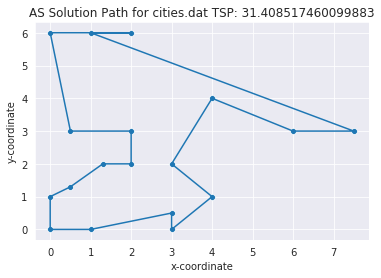

In [77]:
import matplotlib.pyplot as plt
import seaborn as sb

sol = ant_search("cities.dat", 10, 10)

show_locations = sol[0]
show_locations.append(show_locations[0])
cities = create_city("cities.dat")
xes = []
yes = []
for locations in show_locations:
    xes.append(cities[locations][0]) #x loc
    yes.append(cities[locations][1]) #y loc

with sb.axes_style("darkgrid"):
    
    ax = sb.scatterplot(xes[:],yes[:])
    plt.plot(xes[:],yes[:])
    ax.title.set_text("AS Solution Path for cities.dat TSP: "+str(sol[1]))
    ax.set(xlabel = "x-coordinate", ylabel= "y-coordinate")

In [78]:
print(sol)

(['k', 'o', 'r', 'e', 'l', 'd', 'j', 'n', 'b', 'a', 'c', 'f', 'h', 'i', 'q', 'g', 'p', 'm', 'k'], 31.408517460099883)
